In [3]:
# import liberaries
#
import pandas as pd
import seaborn as sea
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)  #Adjust the configuration of plots 

#Read the data
df = pd.read_csv('movies.csv')

df_bkp = df.copy() # Always take a backup of your original dataset

df_bkp.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Let's see if any missing data.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{} - {}%'.format(col,pct_missing))


df = df.dropna()



name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [13]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
yearcorrect - 0.0%


In [6]:
#Observed few columns with unwanted '0' due to float data types, so lets change the datatype to int

#df.budget = df.budget.fillna(0) # To replace the NAN values by 0
#df.gross = df.gross.fillna(0)

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [7]:
#After exploring the data , i noticed the Year column and the year in Released columns are different sometimes. BIG THANKS to ALEX F

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

df['yearcorrect']

df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
yearcorrect      int32
dtype: object

In [8]:
df = df.sort_values(by=['gross'],inplace=False, ascending = False)

In [9]:
pd.set_option('display.max_rows', None)

In [10]:
# Lets check for the duplicate values

duplicate = df[df.duplicated(['name','year','genre','director','country'])] #based on multiple coulmns because same moview name can exist in different countries.
duplicate

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect


<AxesSubplot:xlabel='budget', ylabel='gross'>

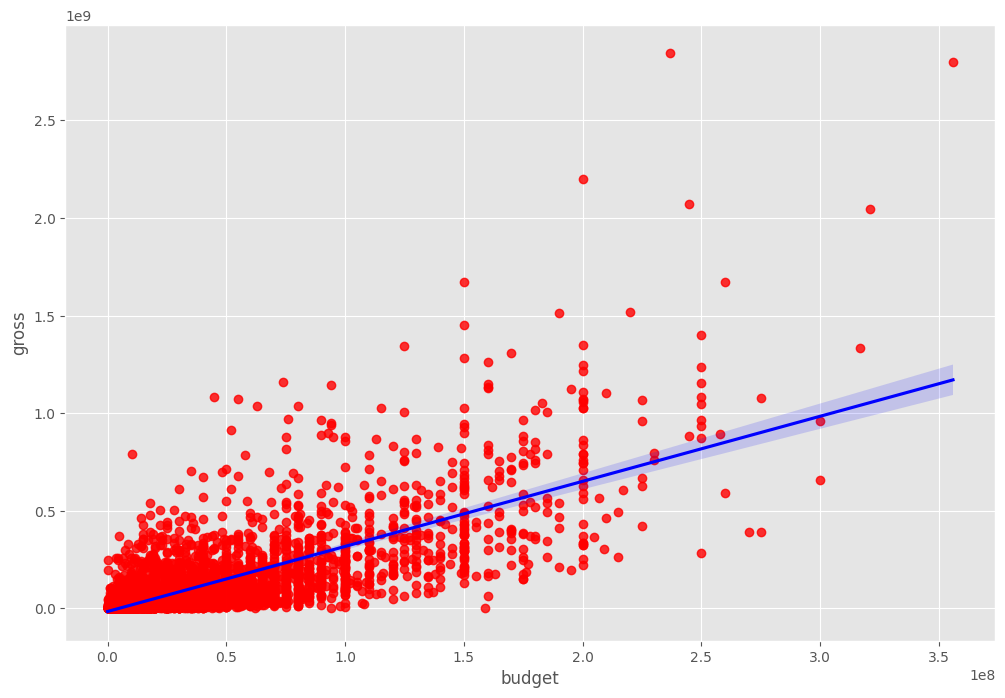

In [15]:
#Plot budget vs gross using seaborn
sea.regplot(x='budget', y='gross', data=df , scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [17]:
#Lets start looking at correlations

df.corr(method='pearson') #pearson,kendal,

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


Text(0.5, 1.0, 'Corerelations matrix for Numeric data')

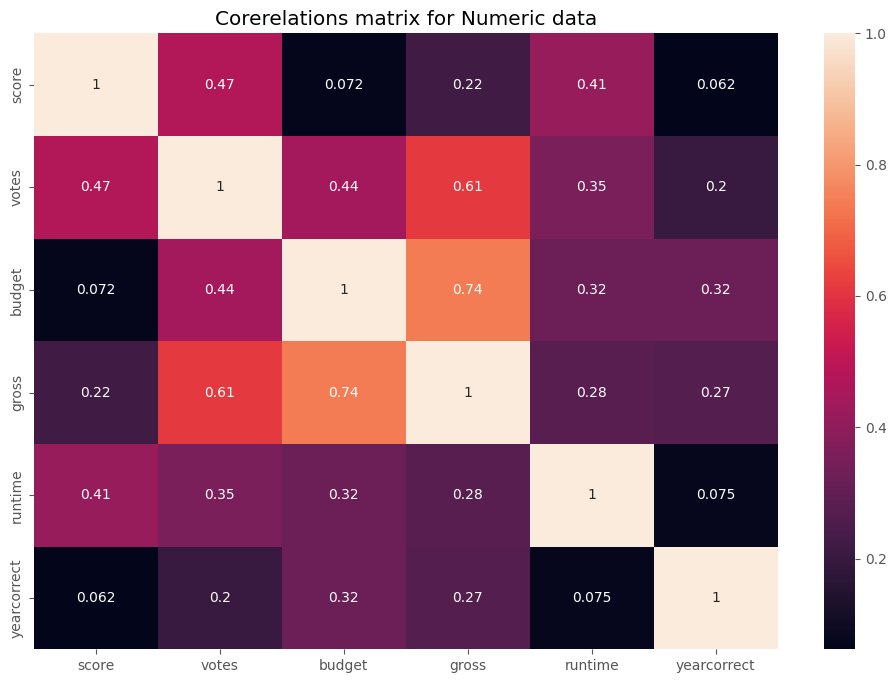

In [38]:
corre_matrix = df.corr(method='pearson')

sea.heatmap(corre_matrix, annot = True)

plt.title("Corerelations matrix for Numeric data")


#we have 2 year columns, need to remove old one and rename the new one to 'year'



In [37]:

df.drop('year',axis = 1, inplace=True)


,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


Text(0.5, 1.0, 'Corerelations matrix for Numeric data')

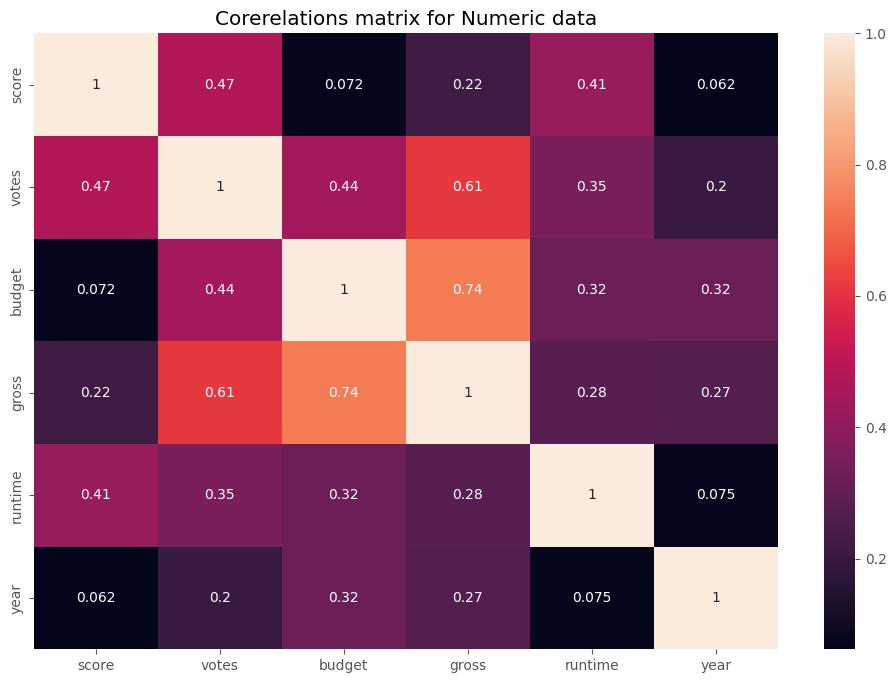

In [41]:
df.rename(columns= {'yearcorrect' : 'year'},inplace=True)

corre_matrix = df.corr(method='pearson')

sea.heatmap(corre_matrix, annot = True)

plt.title("Corerelations matrix for Numeric data")


In [52]:
#Look at Company

df.head()
#So comapnies and other many are object datatype not numeric.   So lets assign them some random numbers so that we can see the correlations among them.

df_num = df.copy()

df_num.head()

for col_name in df_num.columns:
    if df_num[col_name].dtype == 'object':
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes

df_num.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
5445,386,5,0,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018


Text(0.5, 1.0, 'Corerelations matrix for Numeric data')

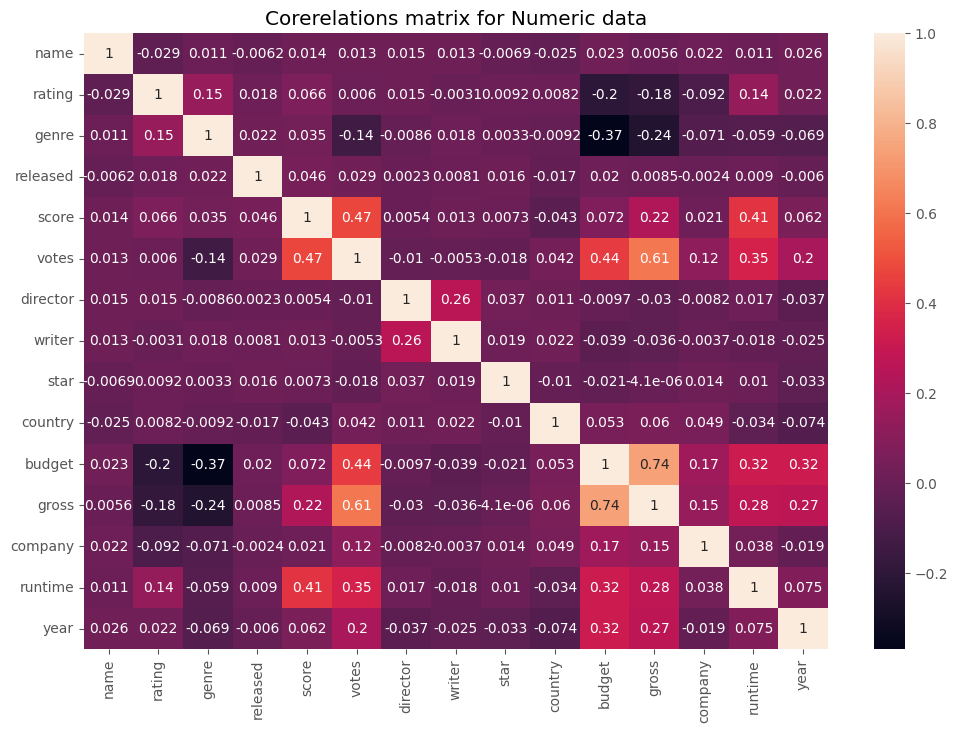

In [53]:
#Now as we have assigned numbsers to the categories let's check the correl;ations.

corre_matrix_total = df_num.corr(method='pearson')

sea.heatmap(corre_matrix_total, annot = True)

plt.title("Corerelations matrix for Numeric data")

In [ ]:
#VOTES AND BUDGET HAVE HIGHEST CORRELATIONS TO GROSS EARNINGS.
# COMPANY HAS LOW CORRELATIONS